In [1]:
import numpy as %notebookp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [108]:
train=pd.read_csv("train.csv")
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [109]:
test=pd.read_csv("test.csv")

In [110]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [60]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [62]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [111]:
train.Item_Fat_Content=train.Item_Fat_Content.replace("low fat","Low Fat")

In [112]:
train.Item_Fat_Content=train.Item_Fat_Content.replace("LF","Low Fat")

In [113]:
train.Item_Fat_Content=train.Item_Fat_Content.replace("reg","Regular")

In [70]:
test.Item_Fat_Content.value_counts()

Low Fat    3677
Regular    2004
Name: Item_Fat_Content, dtype: int64

In [114]:
test.Item_Fat_Content=train.Item_Fat_Content.replace("low fat","Low Fat")

In [115]:
test.Item_Fat_Content=train.Item_Fat_Content.replace("LF","Low Fat")

In [116]:
test.Item_Fat_Content=train.Item_Fat_Content.replace("reg","Regular")

In [117]:
train.Item_Fat_Content=train.Item_Fat_Content.map({"Low Fat":1,"Regular":0})

In [118]:
test.Item_Fat_Content=test.Item_Fat_Content.map({"Low Fat":1,"Regular":0})

In [119]:
train.Item_Weight.fillna(train.Item_Weight.mean(),inplace=True)

In [120]:
test.Item_Weight.fillna(test.Item_Weight.mean(),inplace=True)

In [18]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [121]:
train.Outlet_Identifier=train.Outlet_Identifier.str.replace("OUT","")

In [122]:
train.Outlet_Identifier=train.Outlet_Identifier.astype(int)

In [123]:
test.Outlet_Identifier=test.Outlet_Identifier.str.replace("OUT","")

In [124]:
test.Outlet_Identifier=test.Outlet_Identifier.astype(int)

In [89]:
train.Outlet_Size.value_counts()

Small     4243
Medium    3348
Large      932
Name: Outlet_Size, dtype: int64

In [125]:
train.Outlet_Size=train.Outlet_Size.replace("High","Large")

In [126]:
test.Outlet_Size=test.Outlet_Size.replace("High","Large")

In [131]:
train.Outlet_Size=train.Outlet_Size.map({"Large":3,"Medium":2,"Small":1})

In [132]:
test.Outlet_Size=test.Outlet_Size.map({"Large":3,"Medium":2,"Small":1})

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

In [134]:
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])

In [135]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int64
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null int32
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int64
Outlet_Location_Type         8523 non-null int64
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int32(1), int64(4), object(3)
memory usage: 765.9+ KB


In [147]:
train1=pd.get_dummies(train,columns=["Outlet_Type"],drop_first=True)

In [148]:
test1=pd.get_dummies(test,columns=["Outlet_Type"],drop_first=True)

In [149]:
train1.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000e+00,0.021157,-0.012049,0.024756,-0.009177,-0.008301,0.015529,0.014807,0.011550,-0.002649,0.001299,1.413048e-14
Item_Fat_Content,2.115731e-02,1.000000,-0.047314,-0.006063,-0.000477,-0.003151,-0.001369,0.005900,-0.018719,-0.000533,-0.002129,-1.825365e-04
Item_Visibility,-1.204853e-02,-0.047314,1.000000,-0.001315,-0.111788,-0.074834,-0.029075,-0.009537,-0.128625,-0.144249,-0.034671,-5.114446e-02
Item_MRP,2.475610e-02,-0.006063,-0.001315,1.000000,0.004061,0.005020,-0.001215,-0.007082,0.567574,0.004885,0.003850,-6.713699e-03
Outlet_Identifier,-9.177149e-03,-0.000477,-0.111788,0.004061,1.000000,0.141465,-0.429220,0.014118,0.152660,0.499966,-0.278820,-5.315180e-02
Outlet_Establishment_Year,-8.300836e-03,-0.003151,-0.074834,0.005020,0.141465,1.000000,-0.428367,0.013058,-0.049135,0.245070,0.466336,-5.380723e-01
Outlet_Size,1.552908e-02,-0.001369,-0.029075,-0.001215,-0.429220,-0.428367,1.000000,-0.003525,0.060517,-0.225153,0.201033,2.018832e-01
Outlet_Location_Type,1.480728e-02,0.005900,-0.009537,-0.007082,0.014118,0.013058,-0.003525,1.000000,-0.015435,0.021818,-0.008614,-1.177208e-02
Item_Outlet_Sales,1.155000e-02,-0.018719,-0.128625,0.567574,0.152660,-0.049135,0.060517,-0.015435,1.000000,0.108765,-0.038059,3.111920e-01
Outlet_Type_Supermarket Type1,-2.649136e-03,-0.000533,-0.144249,0.004885,0.499966,0.245070,-0.225153,0.021818,0.108765,1.000000,-0.480943,-4.829766e-01


In [45]:
train.Outlet_Location_Type.value_counts()

2047    1
1346    1
5416    1
7465    1
1322    1
       ..
4735    1
2692    1
645     1
6790    1
0       1
Name: Outlet_Location_Type, Length: 8523, dtype: int64

In [136]:
train.Outlet_Location_Type=train.Outlet_Location_Type.map({"Tier1":3,"Tier2":2,"Tier3":1})

In [137]:
test.Outlet_Location_Type=test.Outlet_Location_Type.map({"Tier1":3,"Tier2":2,"Tier3":1})

In [138]:
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

In [139]:
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

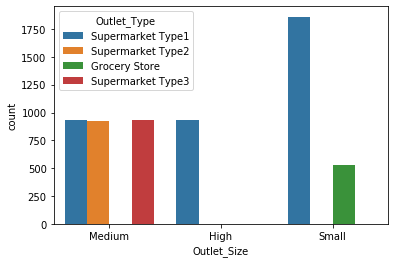

In [8]:
sns.countplot(x="Outlet_Size",hue="Outlet_Type",data=train)

In [9]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

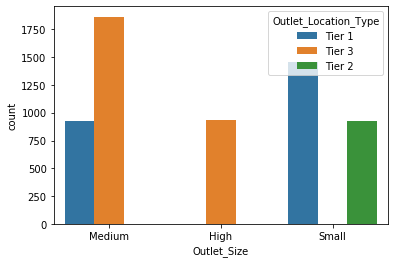

In [10]:
sns.countplot(x="Outlet_Size",hue="Outlet_Location_Type",data=train)

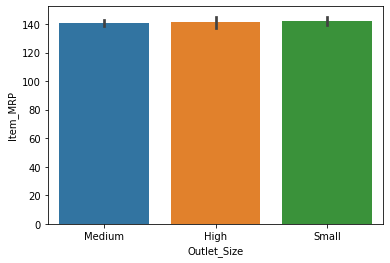

In [11]:
sns.barplot(y="Item_MRP",x="Outlet_Size",data=train)

In [127]:
train.loc[(train["Outlet_Size"].isnull()) & (train["Outlet_Location_Type"]=="Tier 2"),"Outlet_Size"]="Small"

In [130]:
train.Outlet_Size.value_counts()

Small     4243
Medium    3348
Large      932
Name: Outlet_Size, dtype: int64

In [129]:
train.Outlet_Size=train.Outlet_Size.fillna("Medium")

In [14]:
train[train["Outlet_Size"].isnull()][train["Outlet_Location_Type"]=="Tier 2"]

C:\Users\admin2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
33,FDO23,17.85,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.60,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
...,...,...,...,...,...,...,...,...,...,...,...,...
8501,FDW21,5.34,Regular,0.005998,Snack Foods,100.4358,OUT017,2007,NaN,Tier 2,Supermarket Type1,1508.0370
8502,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [15]:
train["Outlet_Size"]=train["Outlet_Size"].fillna(train.Outlet_Size.mode())

In [16]:
train.Outlet_Size.fillna(train.Outlet_Size.mode()[0],inplace=True)

In [17]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [103]:
test.Outlet_Size.fillna(test.Outlet_Size.mode()[0],inplace=True)

In [86]:
df1=train.drop(["Item_Identifier","Item_Type","Item_Fat_Content"],axis=1)

In [87]:
df=pd.get_dummies(df1,drop_first=True)

In [180]:
X_train=train1.drop(["Item_Outlet_Sales","Item_Type","Item_Identifier","Outlet_Establishment_Year"],axis=1)
y_train=train1["Item_Outlet_Sales"]

In [215]:
X_test=test_df.drop(["Outlet_Establishment_Year"],axis=1)

In [186]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [187]:
sqrt(-x)


1171.9515971628732

In [184]:
kf = KFold(n_splits=5)
xgb=xgboost.XGBRegressor(random_state=0)
scores = cross_val_score(xgb, X_train, y_train, scoring="neg_mean_squared_error", cv=kf)
x = scores.mean()
x

-1373470.5460926096

In [216]:
model = xgboost.XGBRegressor(n_estimator=1000, max_depth=12, random_state=13, eta=0.2, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

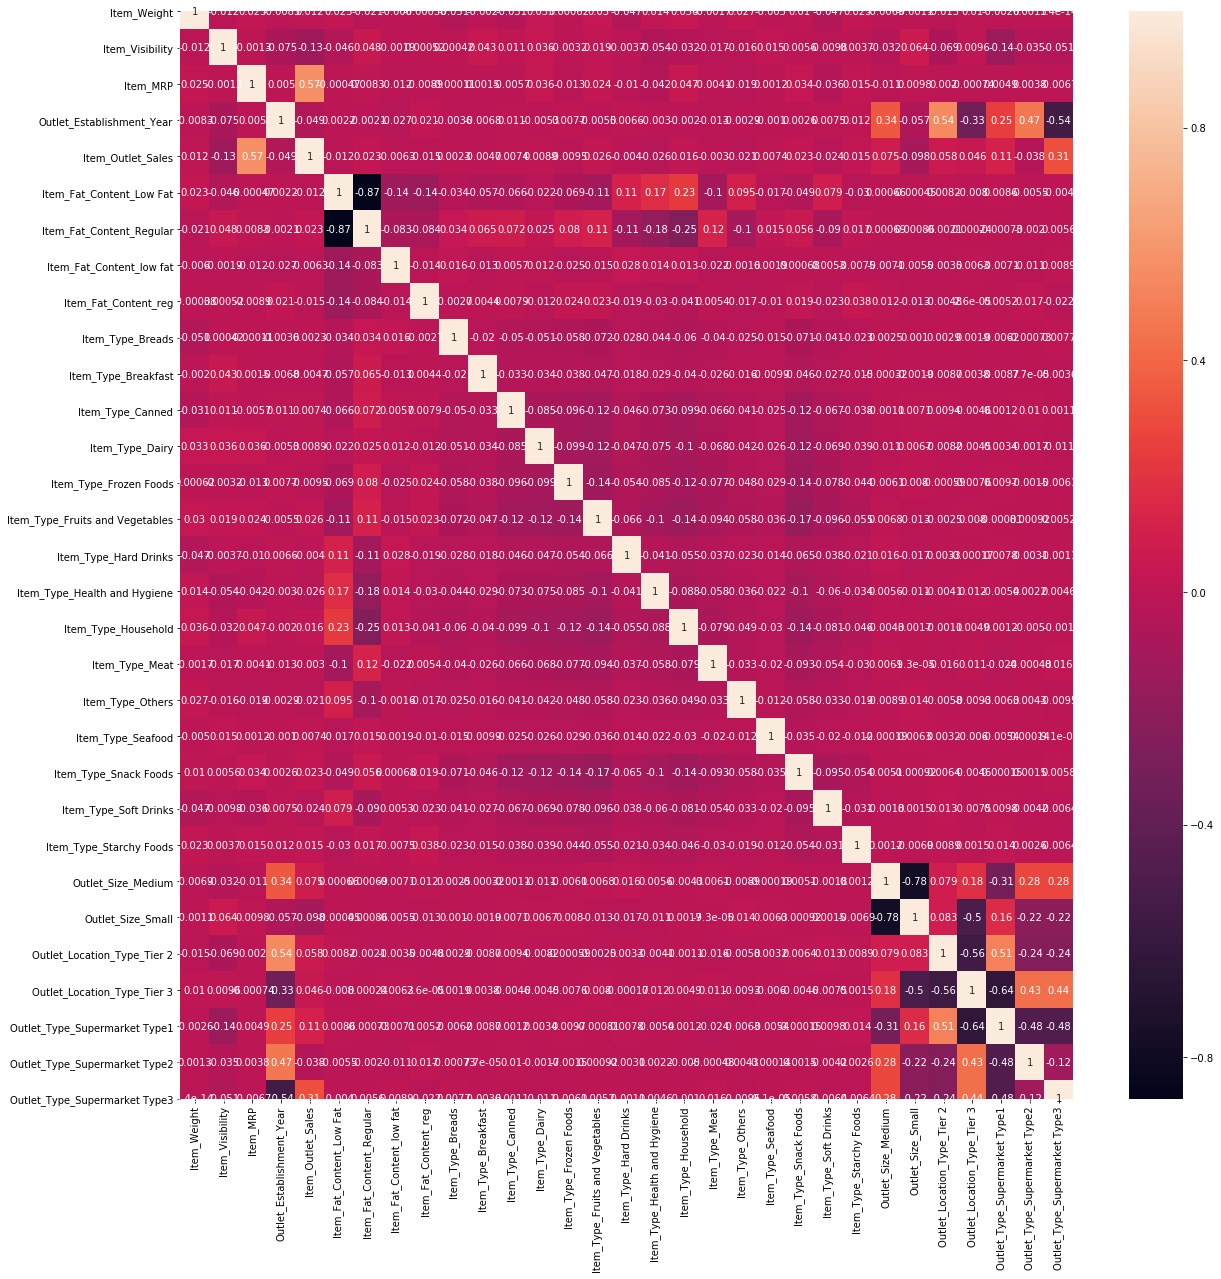

In [25]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot=True)

In [85]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Identifier_OUT013,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000e+00,-0.012049,0.024756,-0.008301,0.011550,0.022808,-0.021263,-0.006014,-0.000379,0.012313,...,-0.017187,0.000758,0.004953,-0.006867,-0.001100,-0.014675,0.010447,-0.002649,0.001299,1.413048e-14
Item_Visibility,-1.204853e-02,1.000000,-0.001315,-0.074834,-0.128625,-0.046386,0.047631,-0.001860,0.000523,-0.041937,...,-0.038353,-0.038444,-0.036130,-0.031642,0.063502,-0.068787,0.009650,-0.144249,-0.034671,-5.114446e-02
Item_MRP,2.475610e-02,-0.001315,1.000000,0.005020,0.567574,-0.000466,0.008299,-0.011904,-0.008865,0.002438,...,-0.000239,0.005983,-0.003906,-0.010578,0.009793,0.001951,-0.000744,0.004885,0.003850,-6.713699e-03
Outlet_Establishment_Year,-8.300836e-03,-0.074834,0.005020,1.000000,-0.049135,0.002218,-0.002051,-0.026852,0.021281,-0.453388,...,0.174150,-0.034777,0.048836,0.342251,-0.056567,0.540820,-0.333895,0.245070,0.466336,-5.380723e-01
Item_Outlet_Sales,1.155000e-02,-0.128625,0.567574,-0.049135,1.000000,-0.011993,0.022618,-0.006326,-0.015148,0.024170,...,0.002274,0.019803,0.034264,0.075154,-0.098403,0.058261,0.046376,0.108765,-0.038059,3.111920e-01
Item_Fat_Content_Low Fat,2.280804e-02,-0.046386,-0.000466,0.002218,-0.011993,1.000000,-0.871729,-0.140476,-0.143620,-0.000374,...,0.011747,-0.002527,0.003611,0.000657,-0.000454,0.008213,-0.007960,0.008565,-0.005452,-4.040993e-03
Item_Fat_Content_Regular,-2.126293e-02,0.047631,0.008299,-0.002051,0.022618,-0.871729,1.000000,-0.082632,-0.084482,-0.002316,...,-0.004692,0.003786,0.000606,0.000693,0.000856,-0.002123,0.000237,-0.000734,-0.002037,5.605465e-03
Item_Fat_Content_low fat,-6.014094e-03,-0.001860,-0.011904,-0.026852,-0.006326,-0.140476,-0.082632,1.000000,-0.013614,0.018992,...,0.002619,-0.017253,-0.007340,-0.007125,-0.005461,-0.003509,0.006282,-0.007121,-0.010567,8.944982e-03
Item_Fat_Content_reg,-3.794890e-04,0.000523,-0.008865,0.021281,-0.015148,-0.143620,-0.084482,-0.013614,1.000000,0.000665,...,-0.005672,-0.002479,0.016925,0.011529,-0.012981,-0.004797,0.000026,0.005176,0.017030,-2.205419e-02
Outlet_Identifier_OUT013,1.231336e-02,-0.041937,0.002438,-0.453388,0.024170,-0.000374,-0.002316,0.018992,0.000665,1.000000,...,-0.122555,-0.122629,-0.122629,-0.438648,-0.218609,-0.244113,0.435419,0.254668,-0.122481,-1.229987e-01


In [151]:
from sklearn.model_selection import train_test_split

In [218]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=205)

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import metrics

In [217]:
from sklearn import metrics


print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))




RMSE: 200.84336515885045


In [28]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


In [ ]:
clf = KNeighborsRegressor(n_neighbors= 3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)


In [154]:
import xgboost
regressor=xgboost.XGBRegressor()

In [90]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [155]:


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [156]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_squared_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=0)

In [219]:
random_cv.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 17.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                   iid='warn', n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                             

In [220]:
random_cv.best_estimator_


XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [35]:
random_cv.best_estimator_


XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [221]:
regressor=xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=4,  monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [222]:
regressor.fit(X_train,y_train)


XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [223]:
pred=regressor.predict(X_test)


In [224]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))

print('MSE:', metrics.mean_squared_error(y_test, pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

r2_score = metrics.r2_score(y_test,pred)
print('R2 Square:', r2_score)


MAE: 778.6190215220436
MSE: 1144326.0239519964
RMSE: 1069.7317532690129
R2 Square: 0.5896281015778637


In [168]:
test1=test.drop(["Item_Identifier","Item_Type"],axis=1)


In [172]:
test_df=pd.get_dummies(test1,columns=["Outlet_Type"],drop_first=True)

In [170]:
test1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,107.8622,49,1999,1,0,Supermarket Type1
1,8.300000,0,0.038428,87.3198,17,2007,263,3790,Supermarket Type1
2,14.600000,1,0.099575,241.7538,10,1998,264,3789,Grocery Store
3,7.315000,0,0.015388,155.0340,17,2007,265,3788,Supermarket Type1
4,12.695633,1,0.118599,234.2300,27,1985,1,3787,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,141.3154,46,1997,0,1888,Supermarket Type1
5677,7.600000,1,0.142991,169.1448,18,2009,1,1887,Supermarket Type2
5678,10.000000,0,0.073529,118.7440,45,2002,262,1886,Supermarket Type1
5679,15.300000,1,0.000000,214.6218,17,2007,854,2839,Supermarket Type1


In [208]:
pred1=model.predict(test_df)

In [209]:
pred=pd.DataFrame(pred1)

In [210]:
sm=pd.read_csv("submit.csv")

In [211]:
submit=pd.concat([sm.Item_Identifier,sm.Outlet_Identifier,pred],axis=1)

In [212]:
submit.columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"]

In [213]:
submit.Item_Outlet_Sales

0        982.007080
1       1043.189575
2        761.611572
3       2570.277100
4       5993.735352
           ...     
5676    1699.199097
5677    1596.286621
5678    1484.074585
5679    4292.078125
5680    1574.360107
Name: Item_Outlet_Sales, Length: 5681, dtype: float32

In [214]:
submit.to_csv("Submission5.csv",index=False)